In [29]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [30]:
df0=pd.read_csv('0D.csv',nrows=60000)
df1=pd.read_csv('1D.csv',nrows=60000)
df2=pd.read_csv('2D.csv',nrows=60000)
df3=pd.read_csv('3D.csv',nrows=60000)
df4=pd.read_csv('4D.csv',nrows=60000)
df0.dropna(inplace=True)
df0.fillna(value=0, inplace=True)
df0.fillna(df0.mean(), inplace=True)


df1.dropna(inplace=True)
df1.fillna(value=0, inplace=True)
df1.fillna(df2.mean(), inplace=True)


df2.dropna(inplace=True)
df2.fillna(value=0, inplace=True)
df2.fillna(df2.mean(), inplace=True)


df3.dropna(inplace=True)
df3.fillna(value=0, inplace=True)
df3.fillna(df3.mean(), inplace=True)


df4.dropna(inplace=True)
df4.fillna(value=0, inplace=True)
df4.fillna(df4.mean(), inplace=True)
print(df1.info())
print(df1.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   V_in          60000 non-null  float64
 1   Measured_RPM  60000 non-null  float64
 2   Vibration_1   60000 non-null  float64
 3   Vibration_2   60000 non-null  float64
 4   Vibration_3   60000 non-null  float64
dtypes: float64(5)
memory usage: 2.3 MB
None
               V_in  Measured_RPM   Vibration_1   Vibration_2   Vibration_3
count  60000.000000  6.000000e+04  60000.000000  60000.000000  60000.000000
mean       1.590400 -1.638350e+07      0.602460      0.915983      0.673900
std        0.807118  6.052935e+07      1.189392      1.583087      1.239735
min        0.000000 -2.400000e+08      0.000000      0.000000      0.000000
25%        2.000000  6.131318e+02      0.027322      0.044179      0.033920
50%        2.000000  6.152253e+02      0.107946      0.190694      0.131169
75%        2.0

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df0)
normalized_df0= pd.DataFrame(normalized_data, columns=df0.columns)


scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df1)
normalized_df1= pd.DataFrame(normalized_data, columns=df1.columns)


scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df2)
normalized_df2= pd.DataFrame(normalized_data, columns=df2.columns)


scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df3)
normalized_df3= pd.DataFrame(normalized_data, columns=df3.columns)


scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df4)
normalized_df4= pd.DataFrame(normalized_data, columns=df4.columns)
import pandas as pd

normalized_df0['unbalance'] = 0
length = len(normalized_df0)
while len(normalized_df0['unbalance']) < length:
    normalized_df0['unbalance'].loc[len(normalized_df0['unbalance'])] = 0
    
    
normalized_df1['unbalance'] = 1
length = len(normalized_df1)
while len(normalized_df1['unbalance']) < length:
    normalized_df1['unbalance'].loc[len(normalized_df1['unbalance'])] = 1

normalized_df2['unbalance'] = 2
length = len(normalized_df2)
while len(normalized_df2['unbalance']) < length:
    normalized_df2['unbalance'].loc[len(normalized_df2['unbalance'])] = 2
    
normalized_df3['unbalance'] = 3
length = len(normalized_df3)
while len(normalized_df3['unbalance']) < length:
    normalized_df3['unbalance'].loc[len(normalized_df3['unbalance'])] = 3
    
normalized_df4['unbalance'] = 4
length = len(normalized_df4)
while len(normalized_df4['unbalance']) < length:
    normalized_df4['unbalance'].loc[len(normalized_df4['unbalance'])] = 4

In [32]:
dfs = [normalized_df0, normalized_df1, normalized_df3, normalized_df3, normalized_df4]

result = pd.concat(dfs, axis=0)
result = result.reset_index(drop=True)
shuffled_result = result.sample(frac=1).reset_index(drop=True)
shuffled_result.head(100)
X = shuffled_result.drop('unbalance', axis=1)
y = shuffled_result['unbalance']
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)
# num_classes = len(label_encoder.classes_)
# y_categorical = to_categorical(y_encoded)

(240000, 5)


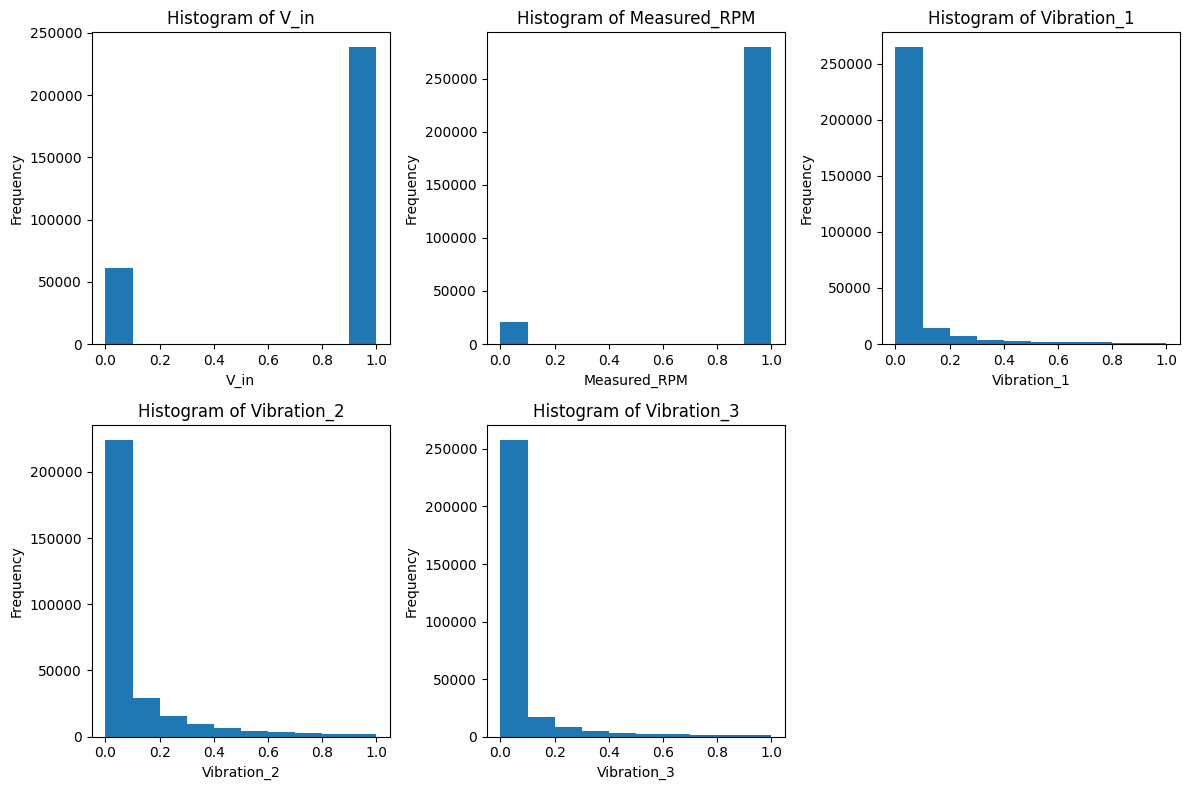

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'result'

# Create a figure and a grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Plot histogram of 'V_in' in the first subplot
axs[0, 0].hist(result['V_in'], bins=10)
axs[0, 0].set_xlabel('V_in')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Histogram of V_in')

# Plot histogram of 'Measured_RPM' in the second subplot
axs[0, 1].hist(result['Measured_RPM'], bins=10)
axs[0, 1].set_xlabel('Measured_RPM')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Histogram of Measured_RPM')

# Plot histogram of 'Vibration_1' in the third subplot
axs[0, 2].hist(result['Vibration_1'], bins=10)
axs[0, 2].set_xlabel('Vibration_1')
axs[0, 2].set_ylabel('Frequency')
axs[0, 2].set_title('Histogram of Vibration_1')

# Plot histogram of 'Vibration_2' in the fourth subplot
axs[1, 0].hist(result['Vibration_2'], bins=10)
axs[1, 0].set_xlabel('Vibration_2')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Histogram of Vibration_2')

# Plot histogram of 'Vibration_3' in the fifth subplot
axs[1, 1].hist(result['Vibration_3'], bins=10)
axs[1, 1].set_xlabel('Vibration_3')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Histogram of Vibration_3')

# Hide the sixth subplot (if not needed)
axs[1, 2].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [34]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
print(X_train.shape)
feature_Sel=SelectFromModel(Lasso(alpha=0.005,random_state=0))
feature_Sel.fit(X_train,y_train)
feature_Sel.get_support()
selected_feat=X_train.columns[(feature_Sel.get_support())]
X_train=X_train[selected_feat]
X_test=X_test[selected_feat]
print(X_train.shape)
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_train.shape)
y_train = to_categorical(y_train)

# Determine the number of classes
num_classes = y_train.shape[1]
# Build the CNN model
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)



(240000, 5)
(240000, 4)
(240000, 4, 1)
Epoch 1/10
6000/6000 [==============================] - 15s 2ms/step - loss: 1.0863 - accuracy: 0.4871 - val_loss: 0.9073 - val_accuracy: 0.5317
Epoch 2/10
6000/6000 [==============================] - 18s 3ms/step - loss: 0.8284 - accuracy: 0.5838 - val_loss: 0.7568 - val_accuracy: 0.5935
Epoch 3/10
6000/6000 [==============================] - 18s 3ms/step - loss: 0.6982 - accuracy: 0.6481 - val_loss: 0.6597 - val_accuracy: 0.6418
Epoch 4/10
6000/6000 [==============================] - 16s 3ms/step - loss: 0.6262 - accuracy: 0.6791 - val_loss: 0.5918 - val_accuracy: 0.6942
Epoch 5/10
6000/6000 [==============================] - 14s 2ms/step - loss: 0.5817 - accuracy: 0.6954 - val_loss: 0.5571 - val_accuracy: 0.7268
Epoch 6/10
6000/6000 [==============================] - 14s 2ms/step - loss: 0.5523 - accuracy: 0.7071 - val_loss: 0.5828 - val_accuracy: 0.7334
Epoch 7/10
6000/6000 [==============================] - 14s 2ms/step - loss: 0.5320 - accur

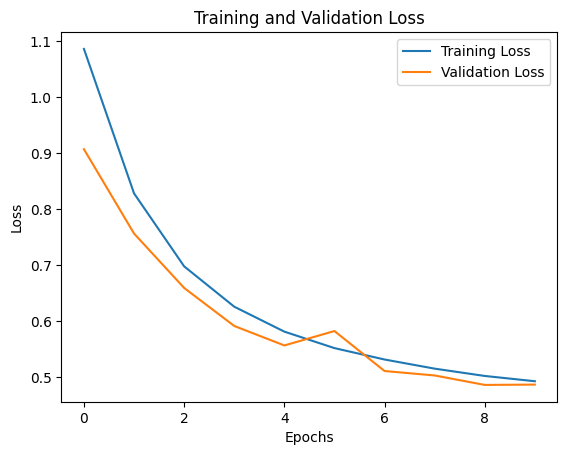

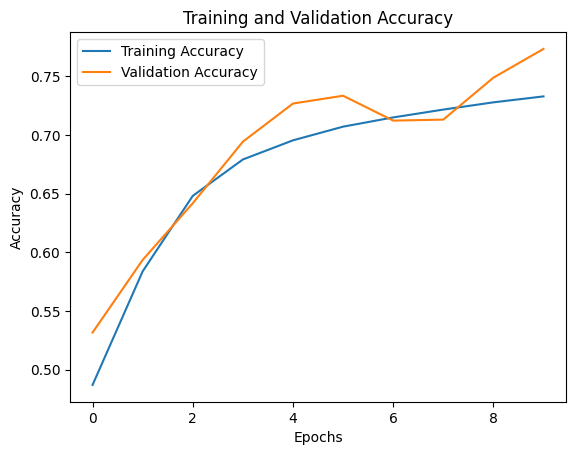

1875/1875 [==============================] - 3s 2ms/step


In [35]:
# Evaluate the model on test data
# loss, accuracy = model.evaluate(X_test, y_test)
# print("Test Loss:", loss)
# print("Test Accuracy:", accuracy)
# Plot the training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
y_pred = model.predict(X_test)

# Calculate metrics


In [36]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)


1875/1875 [==============================] - 3s 1ms/step


ValueError: y_true and y_pred have different number of output (1!=5)